# Chapter 6: Theoretical Linear Algebra

**Before Class**:
* Read Chapter 6 in Savov (2020) and take notes
* Watch the following videos and take notes:
  * [Eigenvectors and eigenvalues](https://www.3blue1brown.com/lessons/eigenvalues)
  * [A quick trick for computing eigenvalues](https://www.3blue1brown.com/lessons/quick-eigen)
  * [Abstract vector spaces](https://www.3blue1brown.com/lessons/abstract-vector-spaces)
* Compile a list of questions to bring to class

**During and After Class**:
* Take notes (on paper or a tablet computer)
* Complete this notebook, submit you answer via Gradescope

In [1]:
import sys
if "google.colab" in sys.modules:
    # If running on colab, install ipympl
    !pip install -q ipympl

    # Enable 3rd party output/widgets
    from google.colab import output
    output.enable_custom_widget_manager()

# % means a "magic command" that is special
# for Jupyter notebooks.
# This specific command enables interactive plots
%matplotlib ipympl

In [2]:
# Here are our standard imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

## Eigendecomposition

Calculate the eigendecomposition of the following matrices by hand and with Python.

$$
{\bf A}_1 = \begin{bmatrix} 2 & 0 \\ 0 & -3 \end{bmatrix}
$$

In [3]:
def print_eigen(A):
    ''' Calculate eigendecomposition and print information

    '''

    print("A =\n",A)
    w, l = la.eig(A)
    print("eigenvalues = ",w)
    print("eigenvectors =\n", l)
    print("rank =", np.linalg.matrix_rank(A))
    print("condition number =", np.linalg.cond(A))

A = np.array([[2, 0], [0, -3]])
print_eigen(A)

A =
 [[ 2  0]
 [ 0 -3]]
eigenvalues =  [ 2.+0.j -3.+0.j]
eigenvectors =
 [[1. 0.]
 [0. 1.]]
rank = 2
condition number = 1.4999999999999996


$$
{\bf A}_2 = \begin{bmatrix} 1 & 0 \\ 1 & 0 \end{bmatrix}
$$

In [4]:
A2 = np.array([[1, 0], [1, 0]])
print_eigen(A2)

A =
 [[1 0]
 [1 0]]
eigenvalues =  [0.+0.j 1.+0.j]
eigenvectors =
 [[0.         0.70710678]
 [1.         0.70710678]]
rank = 1
condition number = inf


$$
{\bf A}_3 = \begin{bmatrix} 2 & 1 \\ 0 & 2 \end{bmatrix}
$$

In [5]:
A3 = np.array([[2, 1], [0, 2]])
print_eigen(A3)

A =
 [[2 1]
 [0 2]]
eigenvalues =  [2.+0.j 2.+0.j]
eigenvectors =
 [[ 1.0000000e+00 -1.0000000e+00]
 [ 0.0000000e+00  4.4408921e-16]]
rank = 2
condition number = 1.6403882032022075


## Matrix Power

Let's say we want to compute

$$
{\bf A}^n = {\bf A A} ...  {\bf A }
$$

This requires $n$ matrix multiplications, which is tedious.

Recall, we decompose a matrix into its eigenvectors and eigenvalues.

$$
{\bf A} = {\bf Q} {\bf \Lambda} {\bf Q}^{-1} = {\bf Q} {\bf \Lambda} {\bf Q}^{T}
$$

Here ${\bf Q}$ is the matrix of right eigenvector, ${\bf Q}^T$ = ${\bf Q}^{-1}$,  and ${\bf \Lambda} = \text{diag}(\lambda_1, \lambda_2, ...)$. 

Now let's plug this into the matrix exponential:

$$
{\bf A}^n = \left({\bf Q} {\bf \Lambda} {\bf Q}^{-1} \right)^n = \left({\bf Q} {\bf \Lambda} {\bf Q}^{-1} \right) \left({\bf Q} {\bf \Lambda} {\bf Q}^{-1} \right) ... \left({\bf Q} {\bf \Lambda} {\bf Q}^{-1} \right)
$$

Finally, we can simplify as ${\bf Q}^{-1} {\bf Q} = {\bf I}$

$$
{\bf A}^n = {\bf Q} {\bf \Lambda}^n {\bf Q}^{-1}
$$

This is easy to compute because ${\bf \Lambda}$ is a diagonal matrix, thus:

$$
{\bf \Lambda}^n = \begin{bmatrix} (\lambda_1)^n & 0 & \dots \\ 0 & (\lambda_2)^n & \dots \\ \vdots & \vdots & \ddots \end{bmatrix}
$$

Calculate

$$
\left( {\bf A}_3 \right)^3 = \left( \begin{bmatrix} 2 & 1 \\ 0 & 2 \end{bmatrix} \right)^3
$$

with pencil and paper two ways: simple matrix multiplication and with the eigendecomposition approach. (Hint, you already calculcated the eigendecomposition.) Then, verify your calculation with Python.

In [6]:
### BEGIN SOLUTION

A3_cubed = A3 @ A3 @ A3

print("A3 cubed = \n", A3_cubed)

### END SOLUTION

A3 cubed = 
 [[ 8 12]
 [ 0  8]]


## Eigenbasis

Recall, we can represent a linear transformation $T({\bf x})$ as the matrix vector product $\bf A x$. Let's interpret the linear transformation $\bf A$ using an eigendecomposition.

$$
\bf{A} = \sum_i \lambda_i {\bf w}_i {\bf w}_i^T
$$

Here, $\lambda_i$ and eigenvalues and ${\bf w}_i$ are the corresponding eigenvectors.

$$
\bf{A x} = \sum_i \lambda_i \left( {\bf w}_i {\bf w}_i^T {\bf x} \right)
$$

Also recall that dot products are communitive, i.e., ${\bf w}_i^T {\bf x} = {\bf x}^T {\bf w}_i = {\bf x} \cdot {\bf w}_i$.

$$
\bf{A x} = \sum_i \lambda_i \left( {\bf w}_i {\bf x} \cdot {\bf w}_i  \right)
$$

Recall that ${\bf w}_i$ are unit vectors, i.e., $||{\bf w}_i|| = 1$ and rearrange:

$$
\bf{A x} = \sum_i \lambda_i \left( \frac{{\bf x} \cdot {\bf w}_i}{|| {\bf w}_i ||^2}  {\bf w}_i  \right)
$$

This means we can intrepet the matrix multiplication $\bf{A x}$ as projecting ${\bf x}$ onto each eigenvector ${\bf w}_i$ and scaling by the eigenvalue $\lambda_i$

$$
\bf{A x} = \sum_i \lambda_i \left( \Pi_{u} {\bf x} \right)
$$

Let's visualize this in 3D.

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Plot vectors
def plot_vector(vector, color, label, p = [0,0,0], linestyle="-"):
    ''' Plot a 3D vector
        Arguments:
            vector: np array
            color: 'r', 'b', 'g', etc.
            label: string for legend
            p: point to start vector
        
    '''
    assert len(vector) == 3, "Must be a 3D vector"
    assert len(p) == 3, "p must have length 3"

    ax = plt.gca()
    ax.quiver(p[0], p[1], p[2], vector[0], vector[1], vector[2], color=color, arrow_length_ratio=0.1, label=label, linestyle=linestyle)

A =
 [[ 1.   0.  -0.5]
 [ 0.   1.   0. ]
 [-0.5  1.   0.5]]
x = [1, 1, 1]
Ax = [0.5 1.  1. ]
eigenvalues =  [1.30901699+0.j 0.19098301+0.j 1.        +0.j]
eigenvectors =
 [[ 8.50650808e-01  5.25731112e-01  8.94427191e-01]
 [ 0.00000000e+00  0.00000000e+00  4.47213595e-01]
 [-5.25731112e-01  8.50650808e-01  2.39731872e-17]]


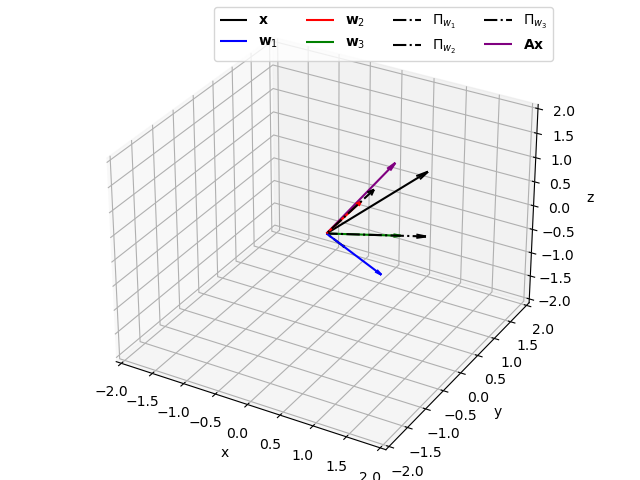

In [12]:
A = np.array([[1,0,-0.5], [0, 1, 0], [-0.5, 1, 0.5]])

x = [1, 1, 1]

print("A =\n",A)
print("x =", x)
print("Ax =", A@x)

# Calculate eigendecomposition
l, w = la.eig(A)
print("eigenvalues = ",l)
print("eigenvectors =\n", w)

# Create empty plot
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

colors = ['blue','red','green']

plot_vector(x, 'black', r'${\bf x}$')

# Plot eigenvectors
for i in range(3):
    plot_vector(w[:,i],colors[i],r'${\bf w}_'+str(i+1)+'$')

# Plot projections
for i in range(3):
    proj = np.dot(x, w[:,i]) * w[:,i] / np.linalg.norm(w[:,i])**2
    #plot_vector(proj, 'black', r'$\lambda_'+str(i+1)+'\Pi_{w_'+str(i+1)+'}} {\bf x}$')
    plot_vector(proj, 'black', r'$\Pi_{w_'+str(i+1)+'}} {\bf x}$', linestyle='-.')

plot_vector(A @ x, 'purple', r'${\bf A x}$')

# Set labels and limits
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

plt.legend(ncol=4)


## Matrix Compression